<a href="https://colab.research.google.com/github/noobylub/Computational-Linguistic/blob/master/LELA60331_Week_8_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8 Seminar: From Binary Logistic Regression to Multiclass Multilayer Neural Networks - part 1





This week we are going to look at multiclass classification and start looking at multilayer networks. But first we are going to return to the calculation of evaluation metrics for binary classifiers.


We finished last week's seminar by building a logistic regression model for a sentiment classification task. The dataset used wass 10000 reviews on Yelp classified as negative (1 or 2 star) or positive (3 or 4 star).

The code for reading in, preprocessing, one-hot encoding and spliting the data is as follows. Please run this one cell now as it will take a minute or two to complete

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/data/yelp_reviews.txt

# Create lists
reviews=[]
labels=[]

with open("yelp_reviews.txt") as f:
   # iterate over the lines in the file
   for line in f.readlines()[1:]:
        # split the current line into a list of two element - the review and the label
        fields = line.rstrip().split('\t')
        # put the current review in the reviews list
        reviews.append(fields[0])
        # put the current sentiment rating in the labels list
        labels.append(fields[1])

from collections import Counter
import re

#### This is where we define the character to split on
token_def = re.compile("[^ ]+")
####

# Tokenise the text, turning a list of strings into a list of lists of tokens. We use very naive space-based tokenisation.
tokenized_sents = [token_def.findall(txt) for txt in reviews]
# Collapse all tokens into a single list
tokens=[]
for s in tokenized_sents:
      tokens.extend(s)
# Count the tokens in the tokens list. The returns a list of tuples of each token and count
counts=Counter(tokens)
# Sort the tuples. The reverse argument instructs to put most frequent first rather than last (which is the default)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
# Extract the list of tokens, by transposing the list of lists so that there is a list of tokens a list of counts and then just selecting the former
so=list(zip(*so))[0]
# Select the firs 5000 words in the list
type_list=so[0:5000]

# Create a 10000 x 5000 matrix of zeros
M = np.zeros((len(reviews), len(type_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = token_def.findall(rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1

train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
test_ints=list(set(range(0,len(reviews))) - set(train_ints))
M_train = M[train_ints,]
M_test = M[test_ints,]
labels_train = [labels[i] for i in train_ints]
labels_test = [labels[i] for i in test_ints]


--2025-11-17 14:06:46--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/data/yelp_reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7005742 (6.7M) [text/plain]
Saving to: ‘yelp_reviews.txt’

yelp_reviews.txt    100%[===================>]   6.68M  --.-KB/s    in 0.08s   

2025-11-17 14:06:46 (86.2 MB/s) - ‘yelp_reviews.txt’ saved [7005742/7005742]



We then built a logistic regression model. The code is below:

Text(0, 0.5, 'loss')

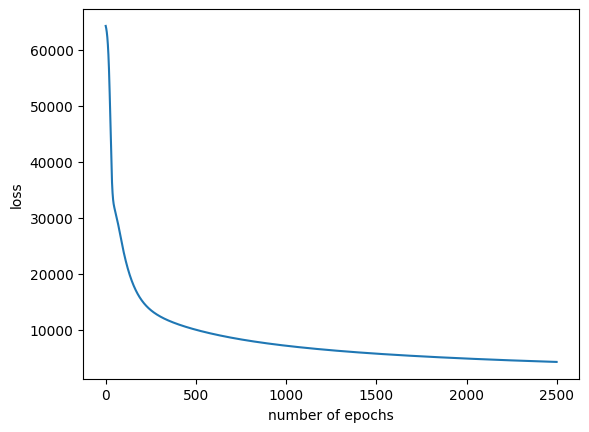

In [ ]:
import math

num_features=5000
y=[int(l == "positive") for l in labels_train]
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 2500
lr=0.1
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters):
  z = M_train.dot(weights)+bias
  q = 1/(1+np.exp(-z))
  eps=0.00001
  loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
  logistic_loss.append(loss)

  dw = ((q-y).dot(M_train) * (1/num_samples))
  db = sum((q-y))/num_samples
  weights = weights - lr*dw
  bias = bias - lr*db

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")
#loss = sum(-(np.ones(len(y))*np.log2(q)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q)))

Now that we have a fitting model, we can use it to predict labels for our test items. The test reviews are in the one-hot matrix M_test. The labels for the test reviews are in the list labels_test.

Problem 1: Complete the code below so that it calculate the vector of predicted values (0 or 1) y_test_pred for our test items.

In [ ]:
  z = ??
  q = ??
  y_test_pred = ??

Calculate accuracy for the performance of our model on the test items:

Remember though that precision is not usually a good measure and so we calculate precision and recall.

Problem 2 : Calculate precision and recall values for the performance of our model on the test data. I have given code for calculating the true positive rate. You will need to calculate the rest of the values from the confusion matrix and then use these numbers to calculate our evaluation metrics.

In [ ]:
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]

In [ ]:
true_positives=sum([int(yp == "positive" and labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])

Problem 3: Calculate precision and recall values for the performance of the model on the training data. How do the numbers differ from those you found for the test set? Why do you think this is?

### Multiclass classification problems

While logistic regression is great for binary classification tasks, many classification problems have more than two possible outcomes.  We can simulate such a situation as follows. I have just generalised sentiment analysis to a three class problem - negative, neutral and positive.



In [ ]:
import numpy as np
## Create simulated data
np.random.seed(10)
w1_center = (1, 3)
w2_center = (3, 1)
w3_center = (1, 1)
w4_center = (3, 3)

x=np.concatenate((np.random.normal(loc=w1_center,size=(20,2)),np.random.normal(loc=w2_center,size=(20,2)),np.random.normal(loc=w3_center,size=(10,2)),np.random.normal(loc=w4_center,size=(10,2))))
labs=np.repeat([0,1,2],[20,20,20],axis=0)
y=np.repeat(np.diag((1,1,1)),[20,20,20],axis=0)
x=x.T
y=y.T

In [ ]:
plt.scatter(x[0][labs==0], x[1][labs==0], marker='*', s=100)
plt.scatter(x[0][labs==1], x[1][labs==1], marker='o', s=100)
plt.scatter(x[0][labs==2], x[1][labs==2], marker='x', s=100)
plt.xlabel("log count of negative words")
plt.ylabel("log count of positive words")
plt.xlim((0,5))
plt.ylim((0,5))


### Representing multinomial logistic regression problems

In multinomial logistic regression we have multiple outcome classes. In place of the single 0 or 1 that we used as outcome in binary logistic regression, we represent the outcome using a vector of 0s and 1, with each position in the vector corresponding to one of the output classes.

positive = [1,0,0] \
negative = [0,1,0] \
neutral = [0,0,1]

This is how the y variable looks in our simulated data:

In [ ]:
y

In [ ]:
y.T[1:20]


### Softmax
In such circumstances we need to use multinomial logistic (aka softmax) regression.

In logistic regression we take the dot product between our feature vector for each data point and our weight vector. We then add the bias to give us a single z value which we feed through the sigmoid function. We can have only one z values because there are only two outcomes and the following relationship holds:
p(y=0|x) = 1-p(y-1)

In multinomial regression we instead have a z value for each of our possible outcomes. We can use these collectively to calculate probabilties for each of our possible outcomes. For example if we had three possible outcomes, 0, 1 or 2 then we would calculate their probabilities as follows:

$p(y=0|x) = \frac{exp(z_{0})}{\sum_{i,N} exp(z_i)}$ \\
$p(y=1|x) = \frac{exp(z_{1})}{\sum_{i,N} exp(z_i)}$ \\
$p(y=2|x) = \frac{exp(z_{2})}{\sum_{i,N} exp(z_i)}$ \\


Problem 4: A fitted model might return the following weights. In Python calculate the probabilites of each of the output classes for the following inputs.


a) x[0] (positive words) = 10, x[1] (negative words) = 3

b) x[0] (positive words) = 3, x[1] (negative words) = 3

c) x[0] (positive words) = 1, x[1] (negative words) = 6


In [ ]:
bias_negative=-0.82031125
bias_positive=-0.451126
bias_neutral = 1.27143725

weights_negative = np.array([-0.69900716, 1.81182487])
weights_positive = np.array([1.7979912 , -0.74611263])
weights_neutral = np.array([0.80449184, -0.07135976])

Note: for convenience you can print a float with scientific notation with the  function np.format_float_positional, as in the following:

In [ ]:
x=1/783618
x

In [ ]:
np.format_float_positional(x)

### Exclusive OR problem

Problem 5: Create the data for the AND, OR, and XOR functions. Fit a logistic regression to these problem using the code you have developed in previous problems and then inspect the output. What do you see?

In [ ]:
x=np.array([])
y=np.array([])

### Your first multilayer network

Problem 6: Enter the weights from the example multilayer network from the lecture and demonstrate that it can solve the XOR problem
Remember that you have two sets of weights - those from layer 0 to layer 1 and those from layer 1 to layer 2 - and that the former is a matrix not a vector.
